
# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 

> **Characteristics:**
- 01 - **PatientId:**
    Identification of a patient
- 02 - **AppointmentID:**
    Identification of each appointment
- 03 - **Gender:**
    Male or Female. 
    Female is the greater proportion, woman takes way more care of they health in comparison to man.
- 04 - **ScheduledDay:**
    The day someone called or registered the appointment, this is before appointment of course.
- 05 - **AppointmentDay:**
    The day of the actuall appointment, when they have to visit the doctor.
- 06 - **Age:**
    How old is the patient.
- 07 - **Neighbourhood:**
    Where the appointment takes place.
- 08 - **Scholarship:**
    True of False. 
    something like medical insurance.
- 09 - **Hipertension:**
    True or False
- 10 - **Diabetes:**
    True or False
- 11 - **Alcoholism:**
    True or False
- 12 - **Handcap:**
    True or False
- 13 - **SMS_received:**
    1 or more messages sent to the patient.
- 14 - **No-show:**
    True or False. True for non show false for show.
    
    
### Question(s) for Analysis


- ##### **Q1:** Are females more likely to show than males?

- ##### **Q2:** Is there an age range that most likely to show, or not to show?

<a id='wrangling'></a>
## Data Wrangling

> Check the data rows and columns:
- What are the columns data types?
- Check for missing data or duplicated rows.

> Check for invaild data like:
- Age < 0 or too high.
- AppointmentDay before ScheduledDay.
- One of the True or False categories have diffrent value.

### Exploring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

#### Loading data

In [2]:
df = pd.read_csv('noshowappointments.csv')

#### Create functions to avoid repetitive code

In [3]:
def check_unique_values(col_name):
    '''
    Return a list containing the unique values in the DataFrame.
    col_name : string containing the column name. 
    
    Returns
    list
    '''
    return np.sort(df[col_name].unique()).tolist()

In [4]:
def count_sort(col_name, col_name_2 = None, bins= None):
    
    '''
    Return a Series containing counts of unique rows in the DataFrame sorted by label.
    col_name : string containing the column name or series containing bool values. 
    col_name_2 : string containing the column name or series containing bool values, optional.
    bins : number of bins to devide the value counts by, optional.
    
    Returns
    Series
    '''
    if not col_name_2:
        anss = df[col_name].value_counts(bins=bins).sort_index()
    else:
        anss = df[col_name][col_name_2].value_counts(bins=bins).sort_index()
    return anss

#### Checking the data

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- lowercase all columns names.
- handcap should be handicap, No-show should be No_show
- The PatientId and AppointmentID columns are irrelevant and should be removed.

#### Checking for missing values and coolumn data types:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There are no null data in the dataset.
- The 'ScheduledDay' and 'AppointmentDay' columns should be converted to datetime and devided into day of week, month.
- No-show should be converted to int (0, 1).

#### Checking for duplicates:

In [7]:
df.duplicated().sum()

0

- There are no duplications

#### Having a look on the data:

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
for ii in df.columns:
    if ii not in ['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay']:
        print(f"{ii}:\n", check_unique_values(ii),"\n")
        

Gender:
 ['F', 'M'] 

Age:
 [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115] 

Neighbourhood:
 ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', '

- Age: has -1 and 115 values that should be dropped or filled with another value depending on the count.
- Handcap: has 2, 3 and 4 values should be dropped or filled with another value depending on the count.

In [10]:
count_sort('Age')[[-1,115]]

-1      1
 115    5
Name: Age, dtype: int64

- only 6 values so will be dropped

In [11]:
count_sort('Handcap')

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

- will replace the higher values with 1


### Data Cleaning
> - Remove the PatientId, AppointmentID columns as they are irrelevant to our analysis.
- Rename 'Handcap' to 'Handicap', 'No-show' to 'No_show', 'ScheduledDay' to 'Scheduled_Day' and 'AppointmentDay' to 'Appointment_Day'.
- Lowercase all the columns names.
- Convert 'ScheduledDay' and 'AppointmentDay' to datetime.
- Create scheduled_Hour, appointment_day_of_week, appointment_month
- Check if there invaild ScheduledDay, AppointmentDay. if there will be dropped.
- Convert No-show to integer (0, 1).
- Drop the invalid age values.
- Replace the higher values of handicap to 1.

#### Remove the PatientId, AppointmentID columns as they are irrelevant to our analysis:

In [12]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)


#### Rename 'Handcap' to 'Handicap', 'No-show' to 'No_show', 'ScheduledDay' to 'Scheduled_Day' and 'AppointmentDay' to 'Appointment_Day':

In [13]:
df.rename(columns={'Handcap': 'Handicap', 'No-show': 'No_show',
                   'ScheduledDay':'Scheduled_Day', 'AppointmentDay':'Appointment_Day'}, inplace=True)

##### Confirm changes

In [14]:
df.head(1)

,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Lowercase all the columns names:

In [15]:
df.columns = df.columns.str.lower()

##### Confirm changes

In [16]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No



#### Convert 'scheduledday' and 'appointmentday' to datetime:

In [17]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

##### Confirm changes

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


#### Create scheduled_Hour, appointment_day_of_week, appointment_month:

In [19]:
df['scheduled_hour'] = df['scheduled_day'].dt.hour
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'].dt.date)

df['appointment_day_of_week'] = df['appointment_day'].dt.day_name()
df['appointment_month'] = df['appointment_day'].dt.month
df['appointment_day'] = pd.to_datetime(df['appointment_day'].dt.date)

##### Confirm changes

In [20]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_hour,appointment_day_of_week,appointment_month
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
gender                     110527 non-null object
scheduled_day              110527 non-null datetime64[ns]
appointment_day            110527 non-null datetime64[ns]
age                        110527 non-null int64
neighbourhood              110527 non-null object
scholarship                110527 non-null int64
hipertension               110527 non-null int64
diabetes                   110527 non-null int64
alcoholism                 110527 non-null int64
handicap                   110527 non-null int64
sms_received               110527 non-null int64
no_show                    110527 non-null object
scheduled_hour             110527 non-null int64
appointment_day_of_week    110527 non-null object
appointment_month          110527 non-null int64
dtypes: datetime64[ns](2), int64(9), object(4)
memory usage: 12.6+ MB


#### Search for invaild dates:

In [22]:
df['num_odays'] = (df['appointment_day'] - df['scheduled_day']).dt.days

In [23]:
print(check_unique_values('num_odays'))

[-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


In [24]:
count_sort('num_odays').iloc[:5]

-6        1
-1        4
 0    38563
 1     5213
 2     6725
Name: num_odays, dtype: int64

Only 5, so will be dropped

#### Drop invaild dates:

In [25]:
df = df.query('num_odays>=0')

##### Confirm changes

In [26]:
count_sort('num_odays').iloc[:5]

0    38563
1     5213
2     6725
3     2737
4     5290
Name: num_odays, dtype: int64


#### Convert no_show to integer (0, 1):

In [27]:
df['no_show'] = df['no_show'].apply(lambda x: 0 if x == "No" else 1)

##### Confirm changes

In [28]:
print(check_unique_values('no_show'))

[0, 1]



#### Drop the invalid age values:

In [29]:
df = df.query('age>=0 and age<=102')

##### Confirm changes

In [30]:
print(check_unique_values('age'))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102]



#### Replace the higher values of handicap to 1

In [31]:
df['handicap'] = df['handicap'].apply(lambda x: 1 if x >= 1 else 0)

##### Confirm changes

In [32]:
print(check_unique_values('handicap'))

[0, 1]


<a id='eda'></a>
## Exploratory Data Analysis



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110516 entries, 0 to 110526
Data columns (total 16 columns):
gender                     110516 non-null object
scheduled_day              110516 non-null datetime64[ns]
appointment_day            110516 non-null datetime64[ns]
age                        110516 non-null int64
neighbourhood              110516 non-null object
scholarship                110516 non-null int64
hipertension               110516 non-null int64
diabetes                   110516 non-null int64
alcoholism                 110516 non-null int64
handicap                   110516 non-null int64
sms_received               110516 non-null int64
no_show                    110516 non-null int64
scheduled_hour             110516 non-null int64
appointment_day_of_week    110516 non-null object
appointment_month          110516 non-null int64
num_odays                  110516 non-null int64
dtypes: datetime64[ns](2), int64(11), object(3)
memory usage: 14.3+ MB


#### Creeating series of boolean index to help selecting data

In [34]:
showed = df.no_show == 0
dntshow = df.no_show == 1

##### Confirm changes

In [35]:
# this will show the first 2 lines of data that contains the patients that didn't show for the appointment.
df[dntshow].head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_hour,appointment_day_of_week,appointment_month,num_odays
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,15,Friday,4,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,15,Friday,4,2


### Research Question 1 (Are Females More Likely to Show Than Males?)

#### why is it important to examine that question?
- It's very important for defining if the patient is going to appointment or not.
- it's also helpful to identify patterns and how each gender react with the health care.

#### Probability of females and males to show up

In [36]:
# start by creating the variable <showed_mf> with our function count_sort which is pandas series containing the counts
# of Males and Females that showed to the apappointment and the labels are sorted alphabetically (F, M).
showed_mf = count_sort(showed,'gender')

#creating dntshow_mf which are simmilar to showed_mf but with the patints that didn't show for the appointment.
d ntshow_mf = count_sort(dntshow,'gender')

# reating the tot_mf variable which conatins the total count of both males and females in both cases (show, non-show).
tot_mf = count_sort('gender')

In [37]:
# dividing the showed_mf by tot_mf and multiply by 100 
# to get the propaplity % of both males and females to show for the appointment.
(showed_mf/tot_mf)*100

F    79.69122
M    80.03619
Name: gender, dtype: float64

#### Results
- Males are more likely to show than females by 80.03619 - 79.69122 = 0.34%.

#### Number of appointments by gender

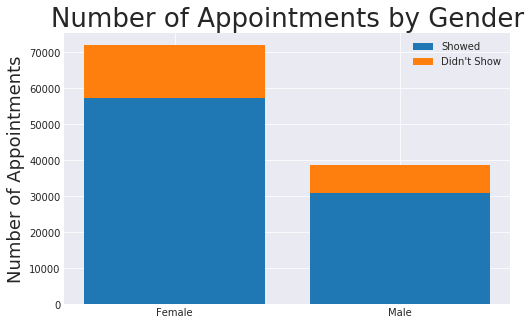

In [38]:
# defining the labels
labels = ['Female', 'Male']

# assigning AxesSubplot to the variable ax to help formating the graph.
#changing the figure size value to make it bigger and more easy to read.
fig, ax = plt.subplots(figsize=(8, 5))

# plot the number of appointments made by males and females.
ax.bar(labels, showed_mf, label='Showed')

# staking the second plot on the first to view the number of non-show appointments made by males and females.
ax.bar(labels, dntshow_mf, bottom=showed_mf, label="Didn't Show")

# giving the graph axis names and title
ax.set_ylabel('Number of Appointments', fontsize=18)
ax.set_title('Number of Appointments by Gender', fontsize=26)

# adding legend
ax.legend();

#### Results
- Females are definitely more likely to go to the hospital and take a better care about thier health than males.

#### Conclusions

- Males are more likely to show than females by 0.34% .
- Females are definitely more likely to go to the hospital and take a better care about thier health than males.

#### Insights

- there should be more ways to educate males about the importance of helth care and visiting the doctors.
- the slight difference in the Probability to show up isn't enough to come with a decision if the gender effects ethir the appointment will be made or not.

### Research Question 2  (Is There An Age Range That Most Likely To Show, Or Not To Show? )

#### why is it important to examine that question?
- It's very important for defining if patient is going to appointment or not.
- it's also helpful to identify patterns and how each age range react with the health care.
- to check if children having propper helth care.
- to find out what age range need too be educated about health care.

#### Number of appointments by age

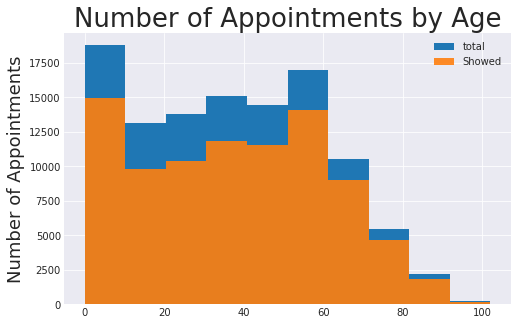

In [39]:
# assigning AxesSubplot to the variable ax1 to help formating the graph.
# changing the figure size value to make it bigger and more easy to read.
fig, ax1 = plt.subplots(figsize=(8, 5))

# plot the number of appointments made by each age range by plotting histogram using the builtin function hist().
# assigning the number of bins to 10 to make it more accurate
ax1.hist(df.age, bins=10, label='total')


# plot second histogram to view the number of non-show appointments made by each age range.
# assigning the number of bins to 10 to make it more accurate, giving it a slight transparency to make it clear.
ax1.hist(df[showed].age, alpha=0.9, bins=10, label='Showed')

# giving the graph axis names and title
ax1.set_ylabel('Number of Appointments', fontsize=18)
ax1.set_title('Number of Appointments by Age', fontsize=26)

# adding legend
ax1.legend();

#### Results
- The highest numbers of appointments are made by Patients in age range between (0 to 10) and (50 to 60).

#### Probabilities of age ranges to show up

In [40]:
# creating list of numbers range from 0 to 100 to be used in divining the age ranges and creating the labels.
bins = list(range(0,110,10))

# labels are created using list comprehensive by combining each number in the list (10 - 20) 
# with the next one ignoring the first value zero.
labels = [str(ii) +" - "+str(ii+10) for ii in bins[1:]]

# creating variable with our function count_sort which is pandas series containing the counts 
# of age ranges that showed to the apappointment and the labels are sorted alphabetically.
showed_age = count_sort(showed,'age',bins)

# creating variable which conatins the total counts of all age ranges in both cases (show, non-show).
tot_age = count_sort('age',bins=bins)

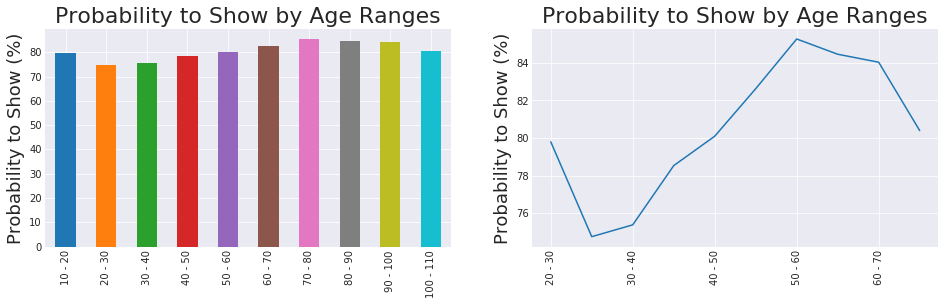

In [41]:
# changing the figure size value to make it bigger and more easy to read.
plt.figure(figsize=(16, 4))

# defining that there are 2 subplots in 1 row and 2 coulmns and we will work on number 1.
plt.subplot(121)

# assigning AxesSubplot to the variable ax2 to help formating the graph.
# dividing the showed_age by tot_age and multiply by 100,
# to get the propaplity % of all age ranges to show for the appointment,
# and finaly using function plot.bar() we plot bar chart containing the probability of each age range to show.
ax2 = (showed_age*100/tot_age).plot.bar();

# changing the x-axis values labels to our list labels.
ax2.set_xticklabels(labels);

# giving the graph axis names and title
ax2.set_ylabel('Probability to Show (%)', fontsize=18);
ax2.set_title('Probability to Show by Age Ranges', fontsize=22);

# defining that there are 2 subplots in 1 row and 2 coulmns and we will work on number 2.
plt.subplot(122)

# assigning AxesSubplot to the variable ax3 to help formating the graph.
# dividing the showed_age by tot_age and multiply by 100,
# to get the propaplity % of all age ranges to show for the appointment,
# and finaly using function plot.bar() we plot line chart containing the probability of each age range to show.
ax3 = (showed_age*100/tot_age).plot.line();

# changing the x-axis values labels to our list labels.
ax3.set_xticklabels(labels);

# giving the graph axis names and title
ax3.set_ylabel('Probability to Show (%)', fontsize=18);
ax3.set_title('Probability to Show by Age Ranges', fontsize=22);

# rotating the x-axis values labels 90'
plt.xticks(rotation=90);

#### Results

- The age range with the highest propaplity to show is (60 to 90) with average propaplity of 84.5%
- The age range with the lowest propaplity to show is (10 to 30) with average propaplity of 75%

#### Conclusions

- The highest numbers of appointments are made by Patients in age range between (0 to 10) and (50 to 60).
- The age range with the highest propaplity to show is (60 to 90) with average propaplity of 84.5%
- The age range with the lowest propaplity to show is (10 to 30) with average propaplity of 75%

#### Insights

- There should be more ways to educate malespatients at the age between (10 to 30) about the importance of helth care and visiting the doctors.
- The difference in the Probability to show up by age ranges is high enough to be considered one of the important characteristics of patients to come with a decision if the patient appointment will be made or not.


<a id='conclusions'></a>
## Conclusions

> **Question (1):** Are females more likely to show than males?
- Males are more likely to show than females by 0.34% .
- Females are definitely more likely to go to the hospital and take a better care about thier health than males.


> **Question (2):** Is there an age range that most likely to show, or not to show?
- The highest numbers of appointments are made by Patients in age range between (0 to 10) and (50 to 60).
- The age range with the highest propaplity to show is (60 to 90) with average propaplity of 84.5% .
- The age range with the lowest propaplity to show is (10 to 30) with average propaplity of 75% .

### Limitations
> The data collected are ffrom the 3 monthes 4,5,6 which in Brazil are the begining of winter so most likely most of the appointments scheduled will be caused by catching a cold and by the time of the appointment the patient could be cured and dont need any medical help.